In [1]:
# TOPIC 

#Machine Learning Starter Program Hackathon


In [100]:
import pandas as pd
import numpy as np
import seaborn as sns

In [101]:
file=r'E:\Laptop\E\Data Science\Python\Project\Hackathons (Analytics_vidhya)\hackthon\Machine Learning Starter Program Hackathon\train.csv'

In [102]:
train=pd.read_csv(file)

In [103]:
file1=r'E:\Laptop\E\Data Science\Python\Project\Hackathons (Analytics_vidhya)\hackthon\Machine Learning Starter Program Hackathon\test.csv'

In [104]:
test=pd.read_csv(file1)

In [105]:
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [106]:
train.shape

(73147, 16)

In [107]:
train['is_pass'].value_counts()

1    50867
0    22280
Name: is_pass, dtype: int64

In [108]:
test.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1626_45,T_1,T,131,45,offline,intermediate,1626,F,Matriculation,3,46.0,2,N,4.0
1,11020_130,Y_3,Y,135,130,online,easy,11020,M,Bachelors,3,NaN,4,N,4.0
2,12652_146,Y_2,Y,120,146,online,easy,12652,M,Matriculation,3,NaN,2,N,3.0
3,7038_72,V_4,V,122,72,offline,vary hard,7038,F,High School Diploma,1,NaN,2,N,2.0
4,888_71,V_4,V,122,71,offline,intermediate,888,F,Matriculation,3,NaN,2,N,2.0


In [109]:
test.shape

(31349, 15)

In [110]:
test['data']='test'
test['is_pass']='NA'

In [111]:
train['data']='train'

In [112]:
train.shape,test.shape

((73147, 17), (31349, 17))

In [ ]:
# Concatenate the train and test data to data cleaning.

In [113]:
all=pd.concat([train,test],0)

C:\Users\srs88\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [114]:
all.shape

(104496, 17)

In [ ]:
# checking NAN value in the data

In [115]:
for col in (all.columns):
    print([col], all[col].isnull().sum())

['age'] 39520
['city_tier'] 0
['data'] 0
['difficulty_level'] 0
['education'] 0
['gender'] 0
['id'] 0
['is_handicapped'] 0
['is_pass'] 0
['program_duration'] 0
['program_id'] 0
['program_type'] 0
['test_id'] 0
['test_type'] 0
['total_programs_enrolled'] 0
['trainee_engagement_rating'] 108
['trainee_id'] 0


In [116]:
all['age'].describe()

count    64976.000000
mean        36.478038
std          9.045325
min         17.000000
25%         28.000000
50%         39.000000
75%         45.000000
max         63.000000
Name: age, dtype: float64

In [118]:
all.loc[all['age'].isnull(),'age']=np.mean(all['age'])

In [119]:
all['trainee_engagement_rating'].describe()

count    104388.000000
mean          2.397776
std           1.327130
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max           5.000000
Name: trainee_engagement_rating, dtype: float64

In [120]:
all.loc[all['trainee_engagement_rating'].isnull(),'trainee_engagement_rating']=np.mean(all['trainee_engagement_rating'])

In [121]:
all.dtypes

age                          float64
city_tier                      int64
data                          object
difficulty_level              object
education                     object
gender                        object
id                            object
is_handicapped                object
is_pass                       object
program_duration               int64
program_id                    object
program_type                  object
test_id                        int64
test_type                     object
total_programs_enrolled        int64
trainee_engagement_rating    float64
trainee_id                     int64
dtype: object

In [ ]:
# checking unique value in the data.

In [122]:
for col in (all.columns):
    print(col,all[col].nunique())

age 46
city_tier 4
data 2
difficulty_level 4
education 5
gender 2
id 104496
is_handicapped 2
is_pass 3
program_duration 10
program_id 22
program_type 7
test_id 188
test_type 2
total_programs_enrolled 13
trainee_engagement_rating 6
trainee_id 19422


In [123]:
all['city_tier'].value_counts()

3    37580
1    33025
2    23186
4    10705
Name: city_tier, dtype: int64

In [124]:
all['difficulty_level'].value_counts()

easy            57211
intermediate    29537
hard            14777
vary hard        2971
Name: difficulty_level, dtype: int64

In [125]:
all.columns

Index(['age', 'city_tier', 'data', 'difficulty_level', 'education', 'gender',
       'id', 'is_handicapped', 'is_pass', 'program_duration', 'program_id',
       'program_type', 'test_id', 'test_type', 'total_programs_enrolled',
       'trainee_engagement_rating', 'trainee_id'],
      dtype='object')

In [126]:
#cf_all['DistArea_ID']=cf_all['DistArea_ID'].str.replace("Area027",'27')
all['difficulty_level']=all['difficulty_level'].str.replace('easy','1')

In [127]:
all['difficulty_level']=all['difficulty_level'].str.replace('intermediate','2')

In [128]:
all['difficulty_level']=all['difficulty_level'].str.replace('hard','3')

In [129]:
all['difficulty_level']=all['difficulty_level'].str.replace('vary 3','4')

In [130]:
all['difficulty_level']=pd.to_numeric(all['difficulty_level'],errors='coerce')

# here I am checking the categorical value and convert into integer and rest of variable, making dummies.

In [131]:
all.dtypes

age                          float64
city_tier                      int64
data                          object
difficulty_level               int64
education                     object
gender                        object
id                            object
is_handicapped                object
is_pass                       object
program_duration               int64
program_id                    object
program_type                  object
test_id                        int64
test_type                     object
total_programs_enrolled        int64
trainee_engagement_rating    float64
trainee_id                     int64
dtype: object

In [132]:
all['education'].value_counts()

High School Diploma    48983
Matriculation          37432
Bachelors              16590
Masters                  754
No Qualification         737
Name: education, dtype: int64

In [133]:
all['education']=all['education'].str.replace('High School Diploma','1')

In [134]:
all['education']=all['education'].str.replace("Matriculation",'2')
all['education']=all['education'].str.replace("Bachelors",'3')
all['education']=all['education'].str.replace("Masters",'4')
all['education']=all['education'].str.replace("No Qualification",'0')

In [135]:
all['education']=pd.to_numeric(all['education'],errors='coerce')

In [136]:
all['gender'].value_counts()

M    55873
F    48623
Name: gender, dtype: int64

In [137]:
#cf_all['ACT_Tier1']=np.where(cf_all['Area_City_Type']=='Tier 1',1,0)
all['gender']=np.where(all['gender']=='M',1,0)

In [138]:
all['is_handicapped'].value_counts()

N    95247
Y     9249
Name: is_handicapped, dtype: int64

In [139]:
all['is_handicapped']=np.where(all['is_handicapped']=='N',1,0)

In [140]:
all.dtypes

age                          float64
city_tier                      int64
data                          object
difficulty_level               int64
education                      int64
gender                         int32
id                            object
is_handicapped                 int32
is_pass                       object
program_duration               int64
program_id                    object
program_type                  object
test_id                        int64
test_type                     object
total_programs_enrolled        int64
trainee_engagement_rating    float64
trainee_id                     int64
dtype: object

In [141]:
train.shape

(73147, 17)

In [142]:
all['program_type'].value_counts()

Y    32304
T    26361
V    18594
U    11213
Z     9337
X     4728
S     1959
Name: program_type, dtype: int64

In [143]:
all['program_type']=all['program_type'].str.replace('S','1')
all['program_type']=all['program_type'].str.replace('T','2')
all['program_type']=all['program_type'].str.replace('U','3')
all['program_type']=all['program_type'].str.replace('V','4')
all['program_type']=all['program_type'].str.replace('X','5')
all['program_type']=all['program_type'].str.replace('Y','6')
all['program_type']=all['program_type'].str.replace('Z','7')

In [144]:
all['program_type'].value_counts()

6    32304
2    26361
4    18594
3    11213
7     9337
5     4728
1     1959
Name: program_type, dtype: int64

In [145]:
all['program_type']=pd.to_numeric(all['program_type'],errors='coerce')

In [146]:
all['test_type'].value_counts()

offline    62256
online     42240
Name: test_type, dtype: int64

In [147]:
all['test_type']=np.where(all['test_type']=='offline',1,0)

In [148]:
all['test_type'].value_counts()

1    62256
0    42240
Name: test_type, dtype: int64

In [149]:
all.dtypes

age                          float64
city_tier                      int64
data                          object
difficulty_level               int64
education                      int64
gender                         int32
id                            object
is_handicapped                 int32
is_pass                       object
program_duration               int64
program_id                    object
program_type                   int64
test_id                        int64
test_type                      int32
total_programs_enrolled        int64
trainee_engagement_rating    float64
trainee_id                     int64
dtype: object

In [150]:
all['program_id'].value_counts()

Y_3    9589
Y_1    9521
T_3    8919
Y_4    7138
T_4    6841
U_1    6792
V_4    6159
T_2    6080
Y_2    6056
V_3    4859
V_1    4856
T_1    4521
U_2    4421
Z_3    3652
Z_2    3016
V_2    2720
Z_1    2669
X_1    1911
X_3    1698
X_2    1119
S_2    1013
S_1     946
Name: program_id, dtype: int64

In [151]:
all.dtypes

age                          float64
city_tier                      int64
data                          object
difficulty_level               int64
education                      int64
gender                         int32
id                            object
is_handicapped                 int32
is_pass                       object
program_duration               int64
program_id                    object
program_type                   int64
test_id                        int64
test_type                      int32
total_programs_enrolled        int64
trainee_engagement_rating    float64
trainee_id                     int64
dtype: object

In [152]:
pd.crosstab(all['program_id'],all['program_type'])

program_type,1,2,3,4,5,6,7
program_id,,,,,,,
S_1,946,0,0,0,0,0,0
S_2,1013,0,0,0,0,0,0
T_1,0,4521,0,0,0,0,0
T_2,0,6080,0,0,0,0,0
T_3,0,8919,0,0,0,0,0
T_4,0,6841,0,0,0,0,0
U_1,0,0,6792,0,0,0,0
U_2,0,0,4421,0,0,0,0
V_1,0,0,0,4856,0,0,0


In [153]:
all.shape

(104496, 17)

In [154]:
dummy=pd.get_dummies(all['program_id'],drop_first=False,prefix='program_id')
dummy

,program_id_S_1,program_id_S_2,program_id_T_1,program_id_T_2,program_id_T_3,program_id_T_4,program_id_U_1,program_id_U_2,program_id_V_1,program_id_V_2,...,program_id_X_1,program_id_X_2,program_id_X_3,program_id_Y_1,program_id_Y_2,program_id_Y_3,program_id_Y_4,program_id_Z_1,program_id_Z_2,program_id_Z_3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31344,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31345,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
31346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
31347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [155]:
all=pd.concat([all,dummy],axis=1)

In [156]:
all.shape

(104496, 39)

In [157]:
del all['program_id']

In [158]:
all.dtypes

age                          float64
city_tier                      int64
data                          object
difficulty_level               int64
education                      int64
gender                         int32
id                            object
is_handicapped                 int32
is_pass                       object
program_duration               int64
program_type                   int64
test_id                        int64
test_type                      int32
total_programs_enrolled        int64
trainee_engagement_rating    float64
trainee_id                     int64
program_id_S_1                 uint8
program_id_S_2                 uint8
program_id_T_1                 uint8
program_id_T_2                 uint8
program_id_T_3                 uint8
program_id_T_4                 uint8
program_id_U_1                 uint8
program_id_U_2                 uint8
program_id_V_1                 uint8
program_id_V_2                 uint8
program_id_V_3                 uint8
p

In [159]:
del all['id']

In [61]:
all.select_dtypes(object).columns

Index(['data', 'is_pass'], dtype='object')

In [62]:
all

,age,city_tier,data,difficulty_level,education,gender,is_handicapped,is_pass,program_duration,program_type,...,program_id_X_1,program_id_X_2,program_id_X_3,program_id_Y_1,program_id_Y_2,program_id_Y_3,program_id_Y_4,program_id_Z_1,program_id_Z_2,program_id_Z_3
0,24.000000,3,train,2,2,1,1,0,136,6,...,0,0,0,1,0,0,0,0,0,0
1,26.000000,4,train,1,1,0,1,1,131,2,...,0,0,0,0,0,0,0,0,0,0
2,40.000000,1,train,1,2,1,1,1,120,7,...,0,0,0,0,0,0,0,0,1,0
3,36.478038,3,train,1,2,0,1,1,117,2,...,0,0,0,0,0,0,0,0,0,0
4,42.000000,1,train,2,1,0,1,1,131,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31344,22.000000,2,test,2,0,0,1,NA,134,2,...,0,0,0,0,0,0,0,0,0,0
31345,41.000000,1,test,1,2,0,1,NA,133,4,...,0,0,0,0,0,0,0,0,0,0
31346,36.478038,2,test,1,3,1,1,NA,136,6,...,0,0,0,1,0,0,0,0,0,0
31347,36.478038,3,test,1,2,0,1,NA,136,7,...,0,0,0,0,0,0,0,1,0,0


In [63]:
all.dtypes

age                          float64
city_tier                      int64
data                          object
difficulty_level               int64
education                      int64
gender                         int32
is_handicapped                 int32
is_pass                       object
program_duration               int64
program_type                   int64
test_id                        int64
test_type                      int32
total_programs_enrolled        int64
trainee_engagement_rating    float64
trainee_id                     int64
program_id_S_1                 uint8
program_id_S_2                 uint8
program_id_T_1                 uint8
program_id_T_2                 uint8
program_id_T_3                 uint8
program_id_T_4                 uint8
program_id_U_1                 uint8
program_id_U_2                 uint8
program_id_V_1                 uint8
program_id_V_2                 uint8
program_id_V_3                 uint8
program_id_V_4                 uint8
p

In [65]:
all.shape[0]

104496

In [66]:
train=all[all['data']=='train']

In [67]:
train['is_pass']=pd.to_numeric(train['is_pass'],errors='coerce')


C:\Users\srs88\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
test=all[all['data']=='test']

In [69]:
train.shape,test.shape

((73147, 37), (31349, 37))

In [70]:
del train['data']

In [71]:
test.drop(['data','is_pass'],1,inplace=True)

C:\Users\srs88\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [72]:
train.dtypes

age                          float64
city_tier                      int64
difficulty_level               int64
education                      int64
gender                         int32
is_handicapped                 int32
is_pass                        int64
program_duration               int64
program_type                   int64
test_id                        int64
test_type                      int32
total_programs_enrolled        int64
trainee_engagement_rating    float64
trainee_id                     int64
program_id_S_1                 uint8
program_id_S_2                 uint8
program_id_T_1                 uint8
program_id_T_2                 uint8
program_id_T_3                 uint8
program_id_T_4                 uint8
program_id_U_1                 uint8
program_id_U_2                 uint8
program_id_V_1                 uint8
program_id_V_2                 uint8
program_id_V_3                 uint8
program_id_V_4                 uint8
program_id_X_1                 uint8
p

In [73]:
train.shape,test.shape

((73147, 36), (31349, 35))

In [74]:
train.dtypes

age                          float64
city_tier                      int64
difficulty_level               int64
education                      int64
gender                         int32
is_handicapped                 int32
is_pass                        int64
program_duration               int64
program_type                   int64
test_id                        int64
test_type                      int32
total_programs_enrolled        int64
trainee_engagement_rating    float64
trainee_id                     int64
program_id_S_1                 uint8
program_id_S_2                 uint8
program_id_T_1                 uint8
program_id_T_2                 uint8
program_id_T_3                 uint8
program_id_T_4                 uint8
program_id_U_1                 uint8
program_id_U_2                 uint8
program_id_V_1                 uint8
program_id_V_2                 uint8
program_id_V_3                 uint8
program_id_V_4                 uint8
program_id_X_1                 uint8
p

In [75]:
test.dtypes

age                          float64
city_tier                      int64
difficulty_level               int64
education                      int64
gender                         int32
is_handicapped                 int32
program_duration               int64
program_type                   int64
test_id                        int64
test_type                      int32
total_programs_enrolled        int64
trainee_engagement_rating    float64
trainee_id                     int64
program_id_S_1                 uint8
program_id_S_2                 uint8
program_id_T_1                 uint8
program_id_T_2                 uint8
program_id_T_3                 uint8
program_id_T_4                 uint8
program_id_U_1                 uint8
program_id_U_2                 uint8
program_id_V_1                 uint8
program_id_V_2                 uint8
program_id_V_3                 uint8
program_id_V_4                 uint8
program_id_X_1                 uint8
program_id_X_2                 uint8
p

In [ ]:
#here I am split the train data to fit the model.

In [ ]:
from sklearn.model_selection import train_test_split

In [77]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier

In [78]:
from sklearn.metrics import roc_auc_score
from sklearn import tree

In [79]:
train1, train2 = train_test_split(train, test_size = 0.2,random_state=2)

In [80]:
train.columns

Index(['age', 'city_tier', 'difficulty_level', 'education', 'gender',
       'is_handicapped', 'is_pass', 'program_duration', 'program_type',
       'test_id', 'test_type', 'total_programs_enrolled',
       'trainee_engagement_rating', 'trainee_id', 'program_id_S_1',
       'program_id_S_2', 'program_id_T_1', 'program_id_T_2', 'program_id_T_3',
       'program_id_T_4', 'program_id_U_1', 'program_id_U_2', 'program_id_V_1',
       'program_id_V_2', 'program_id_V_3', 'program_id_V_4', 'program_id_X_1',
       'program_id_X_2', 'program_id_X_3', 'program_id_Y_1', 'program_id_Y_2',
       'program_id_Y_3', 'program_id_Y_4', 'program_id_Z_1', 'program_id_Z_2',
       'program_id_Z_3'],
      dtype='object')

In [81]:
x_train=train1.drop('is_pass',1)

In [82]:
x_train.shape

(58517, 35)

In [83]:
y_train=train1['is_pass']

In [84]:
y_train.shape

(58517,)

In [85]:
x_test=train2.drop('is_pass',1)

In [86]:
x_test.shape

(14630, 35)

In [87]:
y_test=train2['is_pass']

In [88]:
y_test.shape

(14630,)

# Here I am using Feature Selection

In [91]:
from rfpimp import *
from sklearn.ensemble import RandomForestRegressor

In [89]:
x_train['random']=np.random.random(size=len(x_train))

In [92]:
rf = RandomForestRegressor(n_estimators=100,
                            min_samples_leaf=5,
                            n_jobs=-1,
                            oob_score=True)

In [93]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [94]:
imp = importances(rf, x_train, y_train, n_samples=-1)

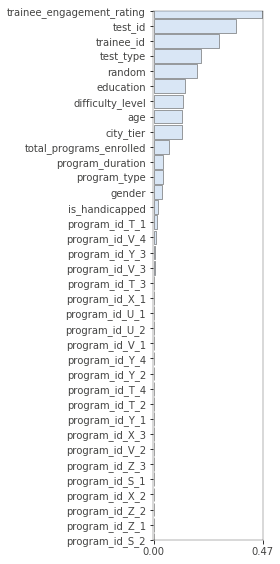

In [95]:
viz = plot_importances(imp)
viz.view()

In [97]:
all.shape

(104496, 37)

In [96]:
all.columns

Index(['age', 'city_tier', 'data', 'difficulty_level', 'education', 'gender',
       'is_handicapped', 'is_pass', 'program_duration', 'program_type',
       'test_id', 'test_type', 'total_programs_enrolled',
       'trainee_engagement_rating', 'trainee_id', 'program_id_S_1',
       'program_id_S_2', 'program_id_T_1', 'program_id_T_2', 'program_id_T_3',
       'program_id_T_4', 'program_id_U_1', 'program_id_U_2', 'program_id_V_1',
       'program_id_V_2', 'program_id_V_3', 'program_id_V_4', 'program_id_X_1',
       'program_id_X_2', 'program_id_X_3', 'program_id_Y_1', 'program_id_Y_2',
       'program_id_Y_3', 'program_id_Y_4', 'program_id_Z_1', 'program_id_Z_2',
       'program_id_Z_3'],
      dtype='object')

In [160]:
all.drop(['age', 'city_tier', 'gender',
       'is_handicapped', 'program_duration', 'program_type',
       'total_programs_enrolled',
       'program_id_S_1',
       'program_id_S_2', 'program_id_T_1', 'program_id_T_2', 'program_id_T_3',
       'program_id_T_4', 'program_id_U_1', 'program_id_U_2', 'program_id_V_1',
       'program_id_V_2', 'program_id_V_3', 'program_id_V_4', 'program_id_X_1',
       'program_id_X_2', 'program_id_X_3', 'program_id_Y_1', 'program_id_Y_2',
       'program_id_Y_3', 'program_id_Y_4', 'program_id_Z_1', 'program_id_Z_2',
       'program_id_Z_3'],1,inplace=True)

In [163]:
all.dtypes

data                          object
difficulty_level               int64
education                      int64
is_pass                      float64
test_id                        int64
test_type                      int32
trainee_engagement_rating    float64
trainee_id                     int64
dtype: object

In [162]:
all['is_pass']=pd.to_numeric(all['is_pass'],errors='coerce')

In [164]:
train=all[all['data']=='train']

In [165]:
train['is_pass']=pd.to_numeric(train['is_pass'],errors='coerce')

C:\Users\srs88\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [166]:
test=all[all['data']=='test']

In [167]:
train.shape,test.shape

((73147, 8), (31349, 8))

In [168]:
del train['data']

In [169]:
test.drop(['data','is_pass'],1,inplace=True)

C:\Users\srs88\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [170]:
from sklearn.model_selection import train_test_split

In [171]:
train1, train2 = train_test_split(train, test_size = 0.2,random_state=2)

In [172]:
x_train=train1.drop('is_pass',1)

In [173]:
x_train.shape

(58517, 6)

In [174]:
y_train=train1['is_pass']

In [175]:
y_train.shape

(58517,)

In [176]:
x_test=train2.drop('is_pass',1)

In [177]:
x_test.shape

(14630, 6)

In [178]:
y_test=train2['is_pass']

In [179]:
y_test.shape

(14630,)

# I m using Decision Tree for good accuracy

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [89]:
clf=DecisionTreeClassifier()

In [90]:
params={ 'class_weight':[None,'balanced'], 
        'criterion':['entropy','gini'],
        'max_depth':[None,5,10,15,20,30,50,70],
            'min_samples_leaf':[1,2,5,10,15,20], 
            'min_samples_split':[2,5,10,15,20]
       }

In [91]:
random_search=RandomizedSearchCV(clf,cv=10,
                                 param_distributions=params,
                                 scoring='roc_auc',
                                 n_iter=10,n_jobs=-1
                                    )

In [92]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

In [93]:
random_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [94]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [95]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.710 (std: 0.00825)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 20, 'max_depth': None, 'criterion': 'entropy', 'class_weight': None}

Model with rank: 2
Mean validation score: 0.707 (std: 0.00784)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 15, 'max_depth': 70, 'criterion': 'gini', 'class_weight': 'balanced'}

Model with rank: 3
Mean validation score: 0.704 (std: 0.00573)
Parameters: {'min_samples_split': 15, 'min_samples_leaf': 10, 'max_depth': 50, 'criterion': 'gini', 'class_weight': None}

Model with rank: 4
Mean validation score: 0.704 (std: 0.00905)
Parameters: {'min_samples_split': 15, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'entropy', 'class_weight': None}

Model with rank: 5
Mean validation score: 0.704 (std: 0.00807)
Parameters: {'min_samples_split': 15, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced'}



In [96]:
dtree=random_search.best_estimator_

In [97]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [121]:
roc_auc_score(y_test,dtree.predict(x_test))

0.6248443410245988

# Then I have use Random Forest Classification for improve the accuracy and to get the best model

In [122]:
clf = RandomForestClassifier()

In [125]:
param_dist = {"n_estimators":[100,200,300,500],
              "max_features": [5,10,20,25,30,35],
              "bootstrap": [True, False],
              'class_weight':[None,'balanced'], 
                'criterion':['entropy','gini'],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [ ]:
report(random_search.cv_results_,5)

In [ ]:
rf=random_search.best_estimator_

In [217]:
rf=RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy', max_depth=20, 
                          max_features=0.5, max_leaf_nodes=None, 
                          min_samples_leaf=10, min_samples_split=20, min_weight_fraction_leaf=0.0, 
                          n_estimators=700, n_jobs=1, oob_score=False, random_state=None, verbose=0, warm_start=False)

In [218]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=0.5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [219]:
roc_auc_score(y_test,rf.predict(x_test))

0.6209496754281967

# here I am using Extra Tree to get the best accuracy

In [175]:
ext_1=ExtraTreesClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=15, max_features=0.75,
            max_leaf_nodes=None, min_samples_leaf=8, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            verbose=1)

In [176]:
ext_1.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.5min finished


ExtraTreesClassifier(bootstrap=True, class_weight='balanced',
                     criterion='entropy', max_depth=15, max_features=0.75,
                     max_leaf_nodes=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=8,
                     min_samples_split=10, min_weight_fraction_leaf=0.0,
                     n_estimators=500, n_jobs=-1, oob_score=False,
                     random_state=None, verbose=1, warm_start=False)

In [177]:
roc_auc_score(y_test,ext_1.predict(x_test))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    2.5s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    2.8s finished


0.6746950716308281

In [137]:
train_score=ext.predict_proba(x_train)[:,1] # the predicted response variable values
real=y_train # the actual response variable values
print(ext.classes_)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    3.5s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    7.7s


[0 1]


[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    8.6s finished


In [ ]:
from sklearn.metrics import fbeta_score

In [138]:
# Here i am Cheking KS score

In [139]:
KS_all=[]
for cutoff in cutoffs:
    predicted=(train_score>cutoff).astype(int)
    TP=((predicted==1) & (real==1)).sum()
    TN=((predicted==0) & (real==0)).sum()
    FP=((predicted==1) & (real==0)).sum()
    FN=((predicted==0) & (real==1)).sum()
    P=TP+FN
    N=TN+FP
    KS=(TP/P)-(FP/N)
    KS_all.append(KS)

In [140]:
list(zip(cutoffs,KS_all))

[(0.01, 0.0),
 (0.02, 0.00011227755010390084),
 (0.03, 0.000673665300623183),
 (0.04, 0.0019648571268174875),
 (0.05, 0.004884073429517799),
 (0.060000000000000005, 0.00906991394834955),
 (0.06999999999999999, 0.013761003442648523),
 (0.08, 0.018371386551832902),
 (0.09, 0.024462388477145658),
 (0.09999999999999999, 0.03199198788903024),
 (0.11, 0.040932060232139134),
 (0.12, 0.049952838960362844),
 (0.13, 0.06174542833090946),
 (0.14, 0.0752186240077295),
 (0.15000000000000002, 0.08989174462541838),
 (0.16, 0.10498929749781705),
 (0.17, 0.12145174502659883),
 (0.18000000000000002, 0.14070356725284017),
 (0.19, 0.1574220307111759),
 (0.2, 0.1716388169022377),
 (0.21000000000000002, 0.18971150418110305),
 (0.22, 0.20656670246396258),
 (0.23, 0.2257549410176547),
 (0.24000000000000002, 0.24410098760992516),
 (0.25, 0.26198725316592675),
 (0.26, 0.2802873904764275),
 (0.27, 0.2981208535313761),
 (0.28, 0.31578923653516777),
 (0.29000000000000004, 0.3323629685932682),
 (0.3, 0.349255858910

In [141]:
mycutoff=cutoffs[KS_all==max(KS_all)][0]
mycutoff

0.51

In [143]:
test_score=ext.predict_proba(test)[:,1]
test_score

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.8s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    4.4s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    4.9s finished


array([0.38116596, 0.8986261 , 0.46722308, ..., 0.65679168, 0.37427944,
       0.72546651])

In [144]:
test_score

array([0.38116596, 0.8986261 , 0.46722308, ..., 0.65679168, 0.37427944,
       0.72546651])

In [145]:
test_classes=(test_score>mycutoff).astype(int)
pd.DataFrame(test_classes).to_csv("Machine Learning Starter Program Hackathon.csv",index=False)

In [146]:
pd.DataFrame(test_classes).to_csv("Machine Learning Starter Program Hackathon.csv",index=False)

# here I am using the Ada Boost

In [224]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier

In [223]:
from sklearn.model_selection import GridSearchCV

In [87]:
AdaboostClassifier?

Object `AdaboostClassifier` not found.


In [231]:
base_clf=DecisionTreeClassifier(max_leaf_nodes=4,class_weight='balanced')

In [232]:
adb_params={'n_estimators':[50,100,200,500,700],
            'learning_rate': [0.01,.1,1]
            }
adb=AdaBoostClassifier(base_estimator=base_clf)

In [233]:
complete_search=GridSearchCV(adb,scoring='roc_auc',param_grid=adb_params,cv=10,n_jobs=-1,verbose=2)

In [ ]:
complete_search.fit(x_train,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 23.9min


In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
report(complete_search.cv_results_,5)

In [178]:
base_clf=DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=10,class_weight='balanced')

In [179]:
adb_best=AdaBoostClassifier(base_estimator=base_clf,learning_rate=0.1,n_estimators=700)

In [180]:
adb_best.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=10,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                      

In [181]:
roc_auc_score(y_test,adb_best.predict(x_test))

0.6897631842516125

In [ ]:
base_clf_5=DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=10,class_weight='balanced')

In [182]:
adb_best_5=AdaBoostClassifier(base_estimator=base_clf,learning_rate=0.1,n_estimators=1000)

In [183]:
adb_best_5.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=10,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                      

In [184]:
roc_auc_score(y_test,adb_best_1.predict(x_test))

0.6958207917900391

In [212]:
base_clf_1=DecisionTreeClassifier(criterion='entropy',max_depth=10,max_features=15,
                                  max_leaf_nodes=10,class_weight='balanced')

In [213]:
adb_best_1=AdaBoostClassifier(base_estimator=base_clf_5,learning_rate=0.1,n_estimators=1200)

In [195]:
adb_best_1.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=10,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                   

In [196]:
roc_auc_score(y_test,adb_best_1.predict(x_test))

0.6985402215215031

In [ ]:
# here I am using XG boost

In [ ]:
clf=XGBClassifier(objective='binary:logistic')

In [134]:
xgb_best=XGBClassifier(subsample=0.8,scale_pos_weight=3,reg_alpha=1e-05,n_estimators=500,min_child_weight=4,
                       max_depth=4,learning_rate=0.1,gamma=0.3,colsample_bytree=0.8
                      )

In [135]:
xgb_best.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=1e-05,
              reg_lambda=1, scale_pos_weight=3, subsample=0.8, tree_method=None,
              validate_parameters=False, verbosity=None)

In [136]:
roc_auc_score(y_test,xgb_best.predict(x_test))

0.5263336779951752